# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [272]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

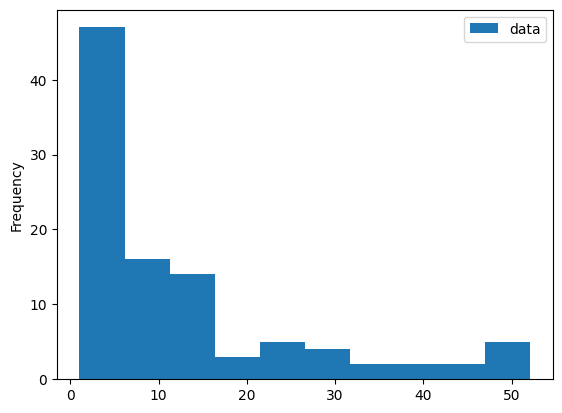

In [273]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

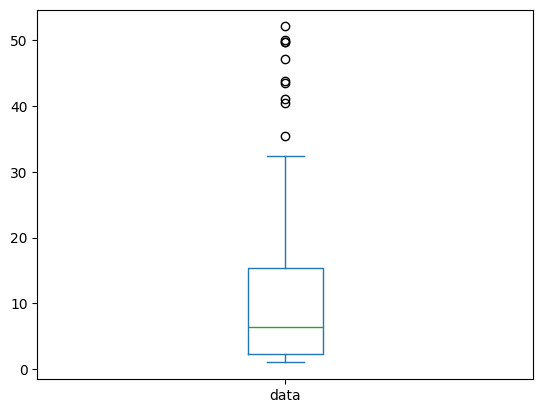

In [274]:
df.plot.box()

Frequency Histogram: The appeal of this plot is the ability of a viewer to examine the full distribution and determine the spread of data (in this case pharmaceutical drug prices). The graph shows a clear skew to the right, showcasing that many prices are lower in comparison to fewer being above 20-30. The downside to this, relative to the boxplot, is the lack of specific information. The displayed percentile gives a bit more insight into the data however the graph does not present information on what would be considered "high" vs "low" pricing.

Boxplot: The upside to the boxplot is it's ability to convey specifics about the data in a relatively compact design. The data median is shown in relation to the middle 50% of the data, providing a much more clear representation of middle, or "normal" pricing. The full range of the data is still shown, as well as outliers in the data, which provide detailed perimeters for particularly high or low prices.

Asthetically, both graphs would benefit from increased labeling, more descriptive text, and color changes. The histogram likley could be improved with more price bins. Overall, the boxplot conveys more information that is desired in the context of this problem (by the administrator) and thus would likely be a better choice.

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [276]:
# Cyber Security Attack Data

security_data = pd.read_csv("cybersecurity_attacks.csv", header=0)

object_columns = [
    'User Information', 'Geo-location Data', 'Device Information', 'Proxy Information', 
    'Payload Data', 'Source IP', 'Source Port', 
    'Destination IP', 'Destination Port' ]
numeric_columns = [
    'Packet Length', 'Anomaly Scores' ]

for column in security_data.columns:
    if column not in object_columns and column not in numeric_columns:
        security_data[column] = security_data[column].astype('category')
    if column in object_columns:
        security_data[column] = security_data[column].astype('object')
    if column in numeric_columns:
        security_data[column] = security_data[column].astype('int')
security_data['Timestamp'] = pd.to_datetime(security_data['Timestamp'], errors='coerce')

security_data.info()
security_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Timestamp               40000 non-null  datetime64[ns]
 1   Source IP Address       40000 non-null  category      
 2   Destination IP Address  40000 non-null  category      
 3   Source Port             40000 non-null  object        
 4   Destination Port        40000 non-null  object        
 5   Protocol                40000 non-null  category      
 6   Packet Length           40000 non-null  int64         
 7   Packet Type             40000 non-null  category      
 8   Traffic Type            40000 non-null  category      
 9   Payload Data            40000 non-null  object        
 10  Malware Indicators      20000 non-null  category      
 11  Anomaly Scores          40000 non-null  int64         
 12  Alerts/Warnings         19933 non-null  catego

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


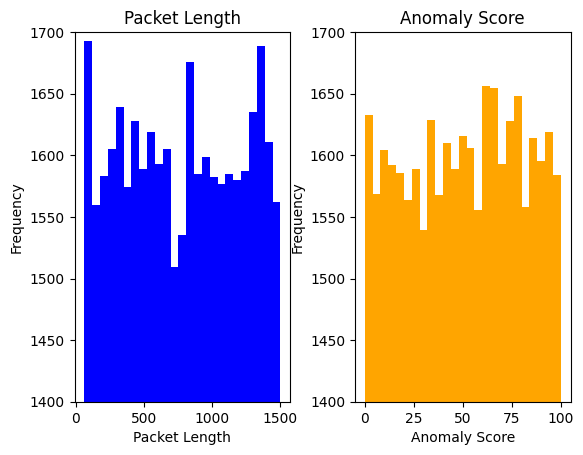

In [277]:
# Histograms
fig, ax = plt.subplots(1, 2) 

ax[0].hist(security_data["Packet Length"].dropna(), bins=25, color='blue')
ax[0].set_title("Packet Length")
ax[0].set_xlabel("Packet Length")
ax[0].set_ylabel("Frequency")
ax[0].set_ylim((1400,1700))

ax[1].hist(security_data["Anomaly Scores"].dropna(), bins=25, color='orange')
ax[1].set_title("Anomaly Score")
ax[1].set_xlabel("Anomaly Score")
ax[1].set_ylabel("Frequency")
ax[1].set_ylim((1400,1700))

plt.subplots_adjust(wspace=0.3)
plt.show()

In [278]:
packet_length = security_data['Packet Length'].dropna()
anomaly_scores = security_data['Anomaly Scores'].dropna()

# Mean
mean_packet_length = packet_length.mean()
mean_anomaly_scores = anomaly_scores.mean()

# Median
median_packet_length = packet_length.median()
median_anomaly_scores = anomaly_scores.median()

# Mode
mode_packet_length = packet_length.mode()[0]
mode_anomaly_scores = anomaly_scores.mode()[0]

print(f"Packet Length - Mean: {mean_packet_length}, Median: {median_packet_length}, Mode: {mode_packet_length}")
print(f"Anomaly Scores - Mean: {mean_anomaly_scores}, Median: {median_anomaly_scores}, Mode: {mode_anomaly_scores}")

# Outlier Check
Q1 = security_data[numeric_columns].quantile(0.25)
Q3 = security_data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = (security_data[numeric_columns] < (Q1 - 1.5 * IQR)) | (security_data[numeric_columns] > (Q3 + 1.5 * IQR))
outliers_iqr_count = outliers_iqr.sum(axis=0)
total_outliers_iqr = outliers_iqr_count.sum()
total_outliers_iqr

Packet Length - Mean: 781.452725, Median: 782.0, Mode: 1037
Anomaly Scores - Mean: 49.6182, Median: 50.0, Mode: 73


np.int64(0)

Only the two columns "Packet Length" and "Anomaly Score" are numeric columns suitable for histogram plots. Neither are showing any distinct patterns or trends in their distributions.

<function matplotlib.pyplot.show(close=None, block=None)>

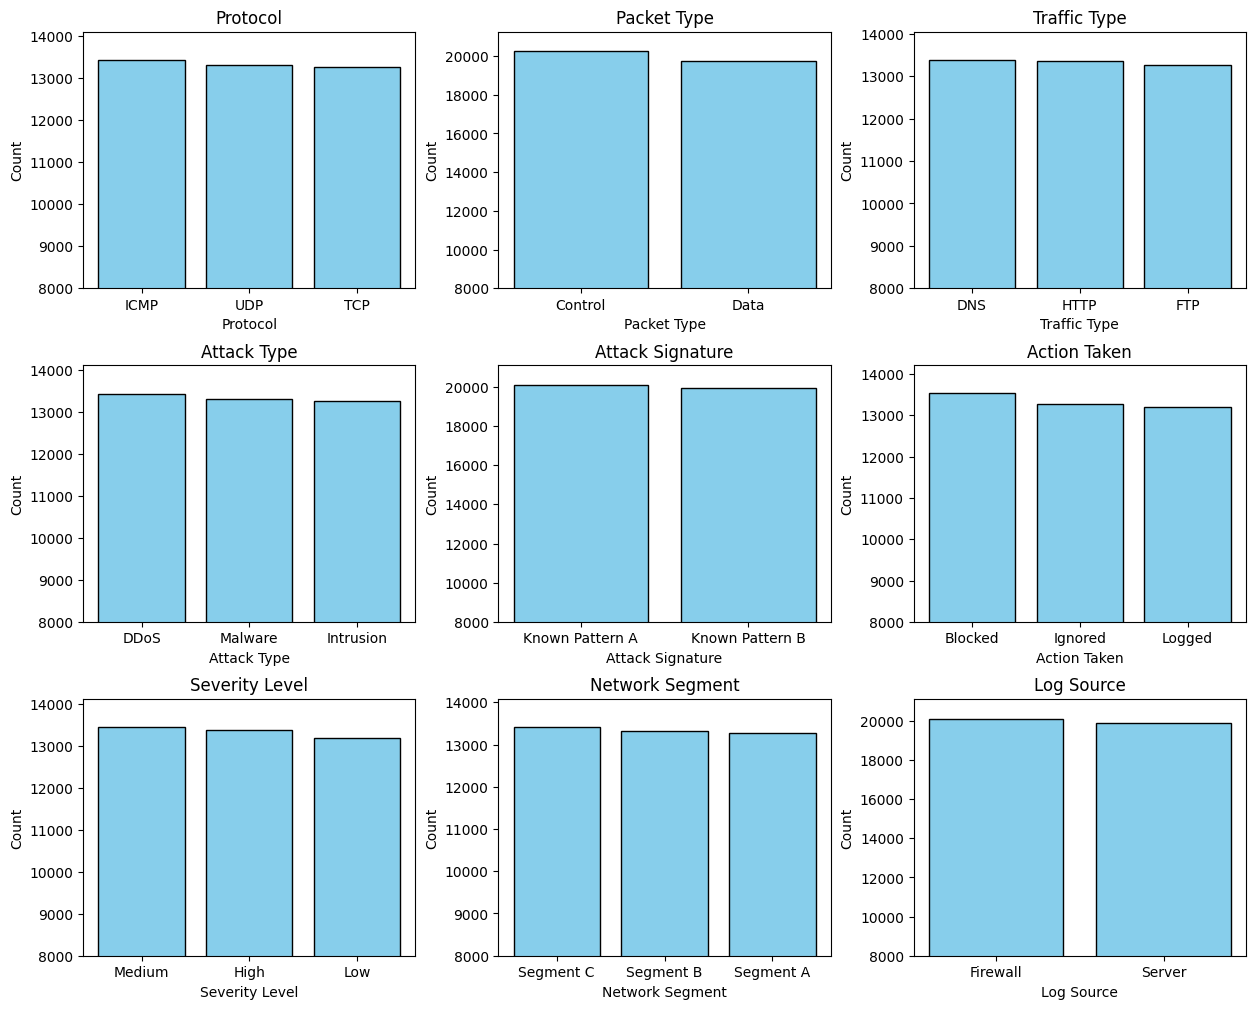

In [279]:
# Categorical Bar Plots

categorical_columns = [
    'Protocol', 'Packet Type', 'Traffic Type', 
    'Attack Type', 'Attack Signature', 'Action Taken', 
    'Severity Level', 'Network Segment', 'Log Source' ]

fig, axes = plt.subplots(3, 3, figsize=(15, 3 * 4))
axes = axes.flatten()  

for i, column in enumerate(categorical_columns):
    counts = security_data[column].value_counts()
    axes[i].bar(counts.index, counts.values, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].set_ylim(bottom=8000)

plt.subplots_adjust(hspace=0.3)
plt.subplots_adjust(wspace=0.25)
plt.show

In [280]:
# UNSW-NB15 Data

UNSW_data = pd.read_csv("UNSW_NB15_training-set.csv", header=0)

numeric_columns = [
    'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sload', 
    'dload', 'sloss', 'dloss', 'sinpkt,' 'dinpkt', 'sjit',	'djit',	'swin',	'stcpb',	
    'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',	'dmean', 'trans_depth',	
    'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm',	
    'ct_dst_sport_ltm',	'ct_dst_src_ltm', 'ct_ftp_cmd', 'ct_flw_http_mthd',	'ct_src_ltm',
    'ct_srv_dst', 'rate' ]

for column in UNSW_data.columns:
    if column in numeric_columns:
        UNSW_data[column] = UNSW_data[column].astype('int')
    else:
        UNSW_data[column] = UNSW_data[column].astype('category')

UNSW_data.info()
UNSW_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 82332 non-null  category
 1   dur                82332 non-null  int64   
 2   proto              82332 non-null  category
 3   service            82332 non-null  category
 4   state              82332 non-null  category
 5   spkts              82332 non-null  int64   
 6   dpkts              82332 non-null  int64   
 7   sbytes             82332 non-null  int64   
 8   dbytes             82332 non-null  int64   
 9   rate               82332 non-null  int64   
 10  sttl               82332 non-null  int64   
 11  dttl               82332 non-null  int64   
 12  sload              82332 non-null  int64   
 13  dload              82332 non-null  int64   
 14  sloss              82332 non-null  int64   
 15  dloss              82332 non-null  int64   
 16  sinp

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0,udp,-,INT,2,0,496,0,90909,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0,udp,-,INT,2,0,1762,0,125000,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0,udp,-,INT,2,0,1068,0,200000,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0,udp,-,INT,2,0,900,0,166666,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0,udp,-,INT,2,0,2126,0,100000,...,1,3,0,0,0,2,3,0,Normal,0


<function matplotlib.pyplot.show(close=None, block=None)>

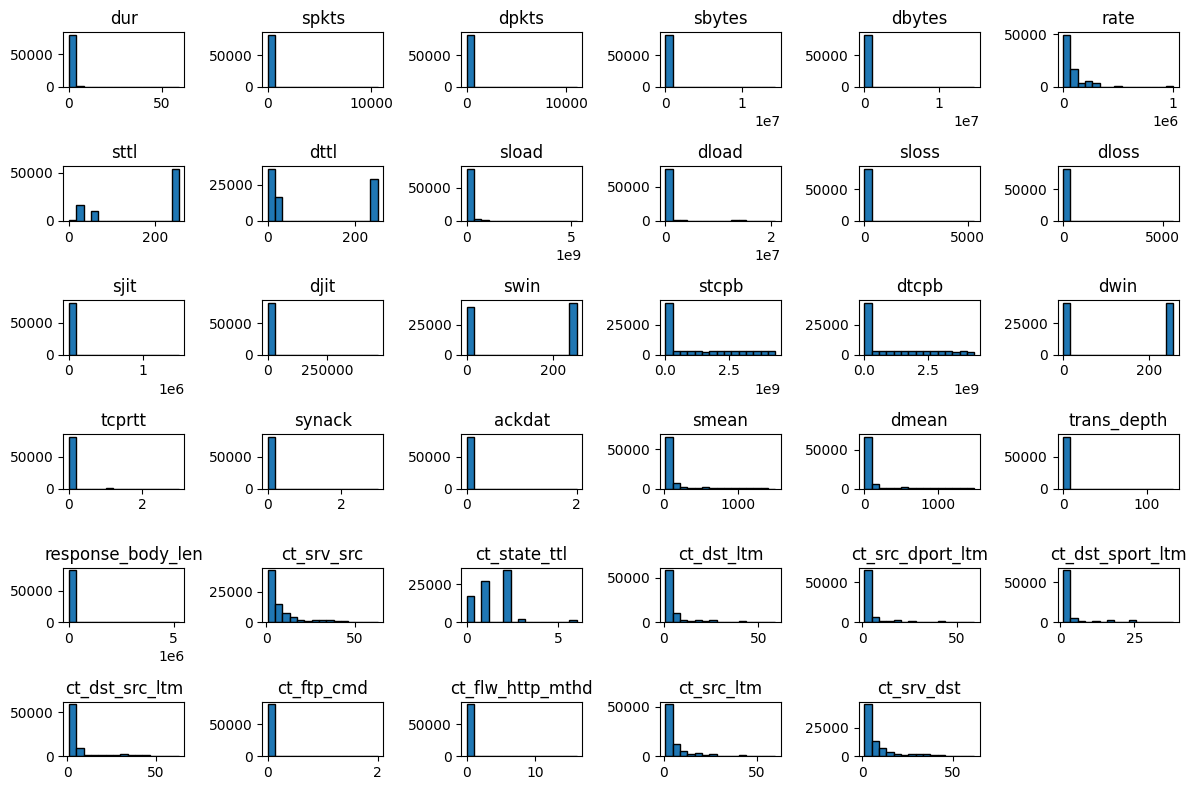

In [281]:
UNSW_data.hist(figsize=(12, 8), bins=15, edgecolor='black', grid=False)
plt.tight_layout() 
plt.show

In [282]:
# Mean, Median, and Mode

numeric_data = [
    'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sload', 
    'dload', 'sloss', 'dloss','sjit',	'djit',	'swin',	'stcpb',	
    'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',	'dmean', 'trans_depth',	
    'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm',	
    'ct_dst_sport_ltm',	'ct_dst_src_ltm', 'ct_ftp_cmd', 'ct_flw_http_mthd',	'ct_src_ltm',
    'ct_srv_dst', 'rate' ]

mean_values = UNSW_data[numeric_data].mean()
median_values = UNSW_data[numeric_data].median()
mode_values = UNSW_data[numeric_data].mode().iloc[0]

df = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values
})

df

# Outlier Check
Q1 = UNSW_data[numeric_data].quantile(0.25)
Q3 = UNSW_data[numeric_data].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = (UNSW_data[numeric_data] < (Q1 - 1.5 * IQR)) | (UNSW_data[numeric_data] > (Q3 + 1.5 * IQR))
outliers_iqr_count = outliers_iqr.sum(axis=0)
total_outliers_iqr = outliers_iqr_count.sum()
total_outliers_iqr

np.int64(238468)

The number of categorical variables in this dataset are limted, with most being ID or nominal features not suitable for most visuals. Below are the bar graphs for binary columns.

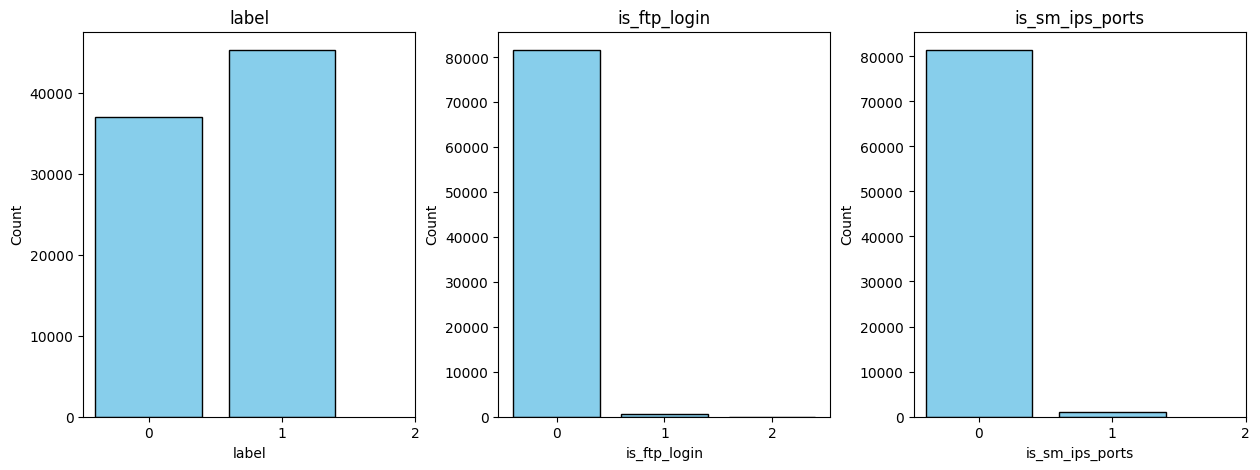

In [283]:
# Bar Plots - Binary Features

binary_columns = ['label', 'is_ftp_login', 'is_sm_ips_ports']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()

for i, column in enumerate(binary_columns):
    counts = UNSW_data[column].value_counts()
    axes[i].bar(counts.index, counts.values, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].set_xticks([0, 1, 2])

plt.subplots_adjust(wspace=0.25)
plt.show()

In [284]:
# BETH Data

BETH_data = pd.read_csv("labelled_2021may-ubuntu-dns.csv", header=0)

numeric_columns = ['NumberOfAnswers', 'DnsResponseCode', 'sus', 'evil' ]


for column in BETH_data.columns:
    if column not in numeric_columns:
        BETH_data[column] = BETH_data[column].astype('category')
    if column in numeric_columns:
        BETH_data[column] = BETH_data[column].astype('int')

BETH_data = BETH_data.drop(columns=['DnsOpCode', 'DnsQueryNames'])
BETH_data['Timestamp'] = pd.to_datetime(BETH_data['Timestamp'], errors='coerce')

BETH_data.info()
BETH_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Timestamp        269 non-null    category
 1   SourceIP         269 non-null    category
 2   DestinationIP    269 non-null    category
 3   DnsQuery         269 non-null    category
 4   DnsAnswer        65 non-null     category
 5   DnsAnswerTTL     65 non-null     category
 6   DnsQueryClass    269 non-null    category
 7   DnsQueryType     269 non-null    category
 8   NumberOfAnswers  269 non-null    int64   
 9   DnsResponseCode  269 non-null    int64   
 10  SensorId         269 non-null    category
 11  sus              269 non-null    int64   
 12  evil             269 non-null    int64   
dtypes: category(9), int64(4)
memory usage: 17.3 KB


,Timestamp,SourceIP,DestinationIP,DnsQuery,DnsAnswer,DnsAnswerTTL,DnsQueryClass,DnsQueryType,NumberOfAnswers,DnsResponseCode,SensorId,sus,evil
0,2021-05-16 17:13:14+00:00,10.100.1.95,10.100.0.2,ssm.us-east-2.amazonaws.com,NaN,NaN,['IN'],['A'],0,0,ip-10-100-1-95,0,0
1,2021-05-16 17:13:14+00:00,10.100.0.2,10.100.1.95,ssm.us-east-2.amazonaws.com,['52.95.19.240'],['17'],['IN'],['A'],1,0,ip-10-100-1-95,0,0
2,2021-05-16 17:13:14+00:00,10.100.1.95,10.100.0.2,ssm.us-east-2.amazonaws.com,NaN,NaN,['IN'],['AAAA'],0,0,ip-10-100-1-95,0,0
3,2021-05-16 17:13:14+00:00,10.100.0.2,10.100.1.95,ssm.us-east-2.amazonaws.com,NaN,NaN,['IN'],['AAAA'],0,0,ip-10-100-1-95,0,0
4,2021-05-16 17:13:16+00:00,10.100.1.186,10.100.0.2,ssm.us-east-2.amazonaws.com,NaN,NaN,['IN'],['A'],0,0,ip-10-100-1-186,0,0


The above numeric columns are primarily zeros with only a few other discrete levels, making them potentially better fit to be categorical features.

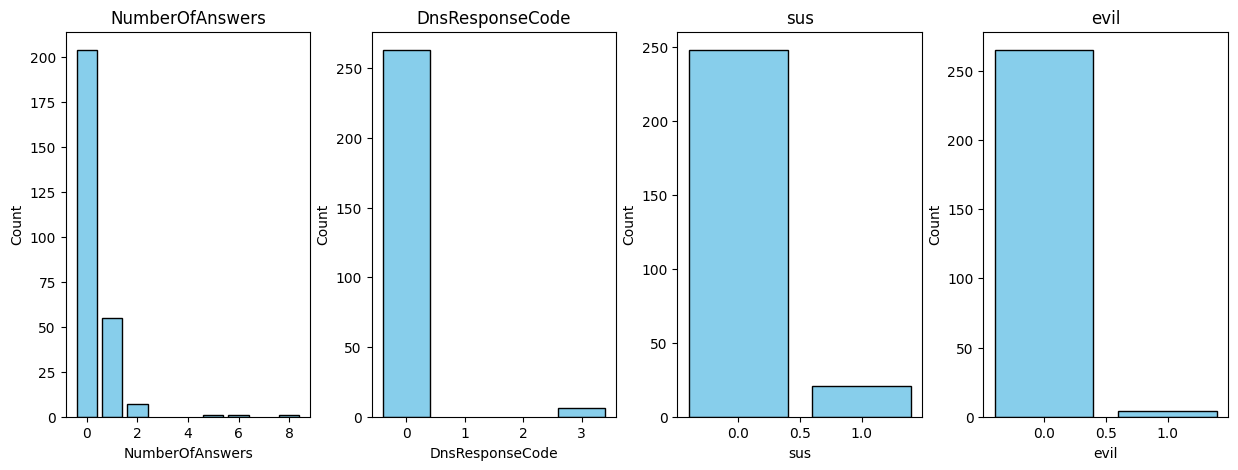

np.int64(96)

In [285]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    counts = BETH_data[column].value_counts()
    axes[i].bar(counts.index, counts.values, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

plt.subplots_adjust(wspace=0.25)
plt.show()

#OUtlier Check
Q1 = BETH_data[numeric_columns].quantile(0.25)
Q3 = BETH_data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = (BETH_data[numeric_columns] < (Q1 - 1.5 * IQR)) | (BETH_data[numeric_columns] > (Q3 + 1.5 * IQR))
outliers_iqr_count = outliers_iqr.sum(axis=0)
total_outliers_iqr = outliers_iqr_count.sum()
total_outliers_iqr

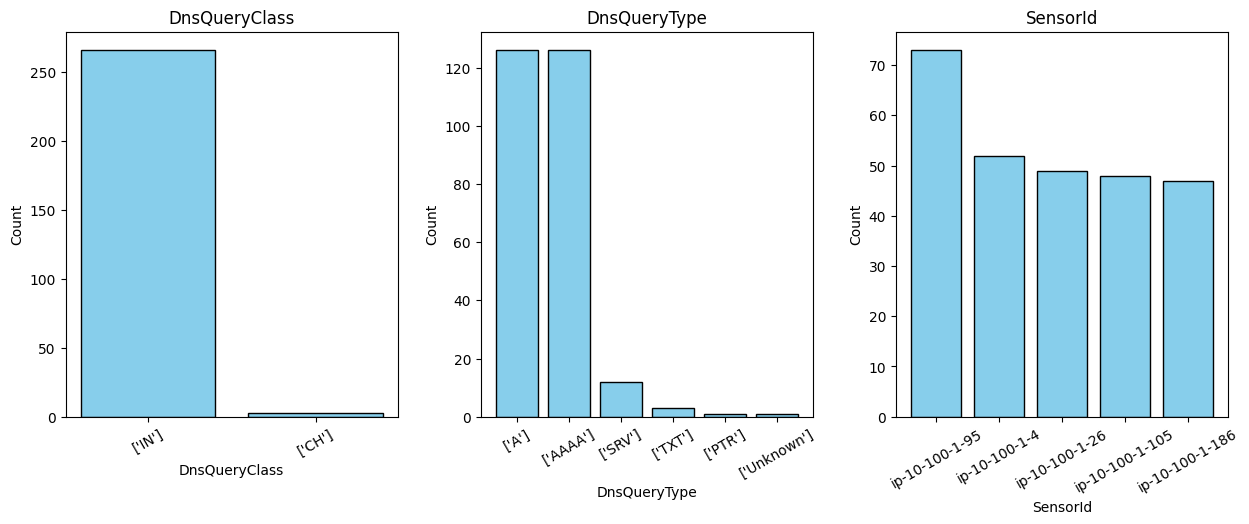

In [286]:
categorical_columns = [ 'DnsQueryClass', 'DnsQueryType', 'SensorId']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    counts = BETH_data[column].value_counts()
    axes[i].bar(counts.index, counts.values, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=30)

plt.subplots_adjust(wspace=0.25)
plt.show()

### Conclusions:

- The distributions of the data vary significantly across datasets. The numerical data in the Cybersecurity Dataset appears almost uniform, with no clear trends. In contrast, the UNSW Dataset contains a large amount of numerical data that exhibits highly skewed distributions. However this is not unexpected, as the BETH and UNSW datasets are noted to be better suited for classification tasks, while the Cybersecurity Dataset, which consists mostly of categorical data, offers more flexibility, making it well-suited for tasks like pattern recognition and prediction. In this analysis none of the shown distributions appeared normal.

- I performed a quick outlier check using IQR for each dataset. Both the Security and BETH datasets showed a number of outliers that could be further examined and classified with a more in-depth analysis. However, the number of outliers in the UNSW dataset was exceptionally high, likely due to the skewed and unusual distributions of the numerical data. Identifying outliers in the UNSW dataset would require more complex methodologies to get a more accurate result.

- From this analysis, adjusting the bin size in histograms was primarily aimed at improving readability. Many of the variables, especially binary ones, exhibited highly unbalanced distributions. Using an inappropriate bin size could lead to a misrepresentation of the data's range, as smaller or poorly chosen bins might appear empty due to the scale of the graph.

- The minimum and maximum values within the graphs vary depending on the data. It's worth noting that I adjusted the y-axis of many histograms to start at non-zero values. This change, similar to adjusting bin sizes, was made primarily for better readability of the data.

After this analysis, the data generally align with what I would expect based on the nature of each dataset.The presence of skewness and outliers, particularly in the UNSW dataset, is not surprising given its complex and unbalanced nature. Similary, given the data types present in the additional datasets I think there is a good range of techniques that can be used for this project in analyzing network security. Further steps will be necessary for effective preprocessing of the data in order to maximize usability. For example, the UNSW dataset has a high number of outliers due to its skewed distributions, which would need more advanced methods to handle, such as transforming variables or using robust outlier detection techniques. The distributions of the data also most likley require more attention, but the data's general characteristics align with the expected purpose.

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

/tmp/ipykernel_45796/103248158.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(survey_items[::-1])


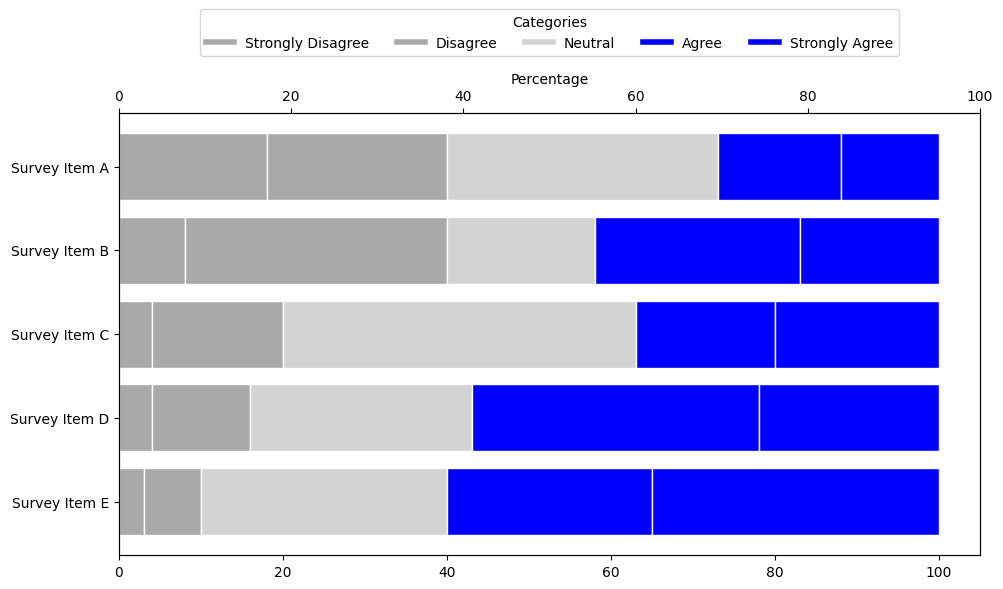

In [310]:
from matplotlib.lines import Line2D

categories = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']
survey_items = ['Survey Item A', 'Survey Item B', 'Survey Item C', 'Survey Item D', 'Survey Item E']
data = np.array([[3, 7, 30, 25, 35],
                 [4, 12, 27, 35, 22],
                 [4, 16, 43, 17, 20],
                 [8, 32, 18, 25, 17],
                 [18, 22, 33, 15, 12]])

category_colors = ['darkgrey', 'darkgrey', 'lightgrey', 'blue', 'blue']

fig, ax = plt.subplots(figsize=(10, 6))
for i, survey_item in enumerate(survey_items):
    left = 0
    for j, category in enumerate(categories):
        ax.barh(survey_item, data[i, j], left=left, height=0.8, color=category_colors[j], label=category if i == 0 else "", edgecolor='white', linewidth=1)
        left += data[i, j]

ax.set_yticklabels(survey_items[::-1]) 
legend_handles = [Line2D([0], [0], color=color, lw=4) for color in category_colors]
ax.legend(legend_handles, categories, title='Categories', loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=5)
plt.subplots_adjust(top=0.85)
plt.tight_layout()

ax2 = ax.twiny()
ax2.set_xlim(0, 100)
ax2.set_xticks(np.arange(0, 101, 20))
ax2.set_xlabel('Percentage')

plt.show()